# NLP Basic Assignment
## 과제 : spam.csv를 활용하여 유의미한 해석을 도출해주세요!

In [16]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다.
- 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다.

In [17]:
spam = pd.read_csv('spam.csv')

In [18]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [19]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


1. 위에서도 확인할 수 있는 것처럼 v1 column에는 spam or ham에 대한 분류가, v2에서는 메일에 대한 내용이 있다.

2. 또한 결측치는 없는 것으로 확인된다.

<Axes: ylabel='count'>

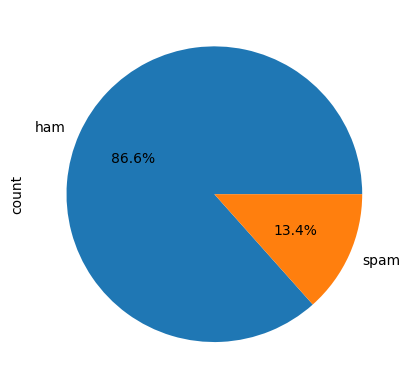

In [21]:
spam['v1'].value_counts().plot(kind='pie',autopct='%1.1f%%')

spam의 비율은 13.4%이고 ham의 비율은 86.6%임을 확인할 수 있다.

순서
1. 토큰화
2. 정제, 추출
3. 인코딩

## Tokenizing


In [22]:
import nltk

In [23]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [24]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gjm10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [25]:
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer

print(WordPunctTokenizer().tokenize(spam.iloc[5]['v2']))
print(TreebankWordTokenizer().tokenize(spam.iloc[5]['v2']))
print(word_tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'", 's', 'been', '3', 'week', "'", 's', 'now', 'and', 'no', 'word', 'back', '!', 'I', "'", 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å', '£', '1', '.', '50', 'to', 'rcv']
['FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']
['FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']


`WordPunctTokenizer`, `TreebankWordTokenizer` 두 개를 비교 했을 때, 어퍼스트로피에 대해서 따로 분류되었고, 또한 단위에 대해서도 따로 분리된 것을 확인할 수 있다. 따라서 단위에 대해서 따로 분리하지 않은 것이 더 적합하다고 생각해서 `TreebankWordTokenizer`를 사용하는 것이 더 자연스러울 것 같다.

`TreebankWordTokenizer`와 `word_tokenize`는 같은 것을 확인할 수 있다. 따라서 다른 문장을 통해 비교해보고자 한다.

In [26]:
print(TreebankWordTokenizer().tokenize(spam.iloc[6]['v2']))
print(word_tokenize(spam.iloc[6]['v2']))

['Even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me.', 'They', 'treat', 'me', 'like', 'aids', 'patent', '.']
['Even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', '.', 'They', 'treat', 'me', 'like', 'aids', 'patent', '.']


`TreebankWordTokenizer`와 `word_tokenize`를 비교했을 때, 온점에 대해서 `word_tokenize`가 적절하게 분류했다고 판단이 되어서 최종적으로 `word_tokenize`를 사용하는 것이 자연스러울 것 같다.

* 어간 추출(stemmer) 및 표제어 추출(Lemmatizer)

In [27]:
from nltk.stem import PorterStemmer, LancasterStemmer
stem1 = PorterStemmer()
stem2 = LancasterStemmer()

print("Porter Stemmer :", [stem1.stem(w) for w in spam.iloc[5]['v2']])
print("Lancaster Stemmer :", [stem2.stem(w) for w in spam.iloc[5]['v2']])

Porter Stemmer : ['f', 'r', 'e', 'e', 'm', 's', 'g', ' ', 'h', 'e', 'y', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'd', 'a', 'r', 'l', 'i', 'n', 'g', ' ', 'i', 't', "'", 's', ' ', 'b', 'e', 'e', 'n', ' ', '3', ' ', 'w', 'e', 'e', 'k', "'", 's', ' ', 'n', 'o', 'w', ' ', 'a', 'n', 'd', ' ', 'n', 'o', ' ', 'w', 'o', 'r', 'd', ' ', 'b', 'a', 'c', 'k', '!', ' ', 'i', "'", 'd', ' ', 'l', 'i', 'k', 'e', ' ', 's', 'o', 'm', 'e', ' ', 'f', 'u', 'n', ' ', 'y', 'o', 'u', ' ', 'u', 'p', ' ', 'f', 'o', 'r', ' ', 'i', 't', ' ', 's', 't', 'i', 'l', 'l', '?', ' ', 't', 'b', ' ', 'o', 'k', '!', ' ', 'x', 'x', 'x', ' ', 's', 't', 'd', ' ', 'c', 'h', 'g', 's', ' ', 't', 'o', ' ', 's', 'e', 'n', 'd', ',', ' ', 'å', '£', '1', '.', '5', '0', ' ', 't', 'o', ' ', 'r', 'c', 'v']
Lancaster Stemmer : ['f', 'r', 'e', 'e', 'm', 's', 'g', ' ', 'h', 'e', 'y', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'd', 'a', 'r', 'l', 'i', 'n', 'g', ' ', 'i', 't', "'", 's', ' ', 'b', 'e', 'e', 'n', ' ', '3', ' ', 'w', 'e', 'e', 'k', "'", 's', '

Porter Stemmer의 경우 `like`와 `still`에 대해서 그대로 반영되지만, Lancaster Stemmer의 경우 다르게 `lik`, `stil`로 추출된다.

* 불용어 제거 (잘 쓰이지 않는 단어들, 없어도 되는 단어들)

In [28]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english')[:5])

['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gjm10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
spam['v2'] = spam['v2'].apply(nltk.tokenize.word_tokenize)

stop_words = list(stopwords.words('english'))

result = []
for words in spam['v2']: 
    x = [word for word in words if word not in stop_words]
    result.append(x) 

spam['v2'] = result
print(spam['v2'])

0       [Go, jurong, point, ,, crazy, .., Available, b...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3       [U, dun, say, early, hor, ..., U, c, already, ...
4       [Nah, I, n't, think, goes, usf, ,, lives, arou...
                              ...                        
5567    [This, 2nd, time, tried, 2, contact, u., U, å£...
5568         [Will, Ì_, b, going, esplanade, fr, home, ?]
5569       [Pity, ,, *, mood, ., So, ..., suggestions, ?]
5570    [The, guy, bitching, I, acted, like, 'd, inter...
5571                           [Rofl, ., Its, true, name]
Name: v2, Length: 5572, dtype: object


불용어 목록을 다운받은 다음에 문장의 토큰화 결과에 적용시키는 과정을 담은 알고리즘이다.

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram 등이 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [30]:
import gensim
from gensim.models import Word2Vec, FastText
import scipy.stats as st
# import glove
# from glove import Corpus, Glove

1. 원-핫 인코딩

In [31]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

# 텍스트 데이터
spam_c = spam.copy()
labels = spam['v1'].tolist()
texts = spam['v2'].tolist()

# Tokenizer를 사용하여 텍스트를 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# 고유한 토큰의 수
num_tokens = len(tokenizer.word_index) + 1

# 토큰을 정수 시퀀스로 변환
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=10, padding='post', truncating='post')

# 원핫 인코딩으로 변환
one_hot_encoded = to_categorical(padded_sequences, num_classes=num_tokens)

print(one_hot_encoded)


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]]


CBOW

In [32]:
# CBOW model 학습 정상 메일

model = Word2Vec(spam[spam['v1'] == 'ham']['v2'], min_count=5, vector_size=100, window=10, epochs=200, sg=0)
# min_count -> 최소 등장 횟수, vector_size = 단어 벡터의 크기(차원), window = 주변 단어를 고려하는 창(window) 크기 설정, epochs = 학습 반복 횟수 설정, sg = CBOW 모델에서 사용하는 파라미터 

model.save('w2v_CBOW_ham')

w2v_CBOW_ham = Word2Vec.load('w2v_CBOW_ham')

y1 = w2v_CBOW_ham.wv.most_similar(positive=["hours"], topn=10)
y1

[('months', 0.36202821135520935),
 ('minutes', 0.3495646119117737),
 ('came', 0.3291386663913727),
 ('hour', 0.32217758893966675),
 ('took', 0.31175270676612854),
 ('|', 0.31092801690101624),
 ('8', 0.3035089075565338),
 ('slave', 0.30160143971443176),
 ('WE', 0.3007701337337494),
 ('||', 0.2997508645057678)]

In [33]:
y1 = list(zip(*y1))[0] # 단어 요소들만 추출해서 대입, 데이터 전치와 같은 의미

In [34]:
# CBOW model 학습 스팸 메일

model = Word2Vec(spam[spam['v1'] == 'spam']['v2'], min_count=5, vector_size=100, window=10, epochs=200, sg=0)

model.save('w2v_CBOW_spam')

w2v_CBOW_spam = Word2Vec.load('w2v_CBOW_spam')

x1 = w2v_CBOW_spam.wv.most_similar(positive=["hours"], topn=10)
x1


[('reward', 0.8561946153640747),
 ('å£900', 0.5722236037254333),
 ('code', 0.5672751665115356),
 ('time', 0.4903421700000763),
 ('use', 0.44569551944732666),
 ('PC', 0.4168759286403656),
 ('inc', 0.41523033380508423),
 ('CALL', 0.3997863531112671),
 ('awaiting', 0.38417962193489075),
 ('quoting', 0.37759673595428467)]

In [35]:
x1 = list(zip(*x1))[0]

Skipgram

In [36]:
# Skipgram 학습 정상 메일

model = Word2Vec(spam[spam['v1'] == 'ham']['v2'], min_count=5, vector_size=100, window=10, epochs=200, sg=1)

model.save('w2v_skipgram_ham')

w2v_skipgram_ham = Word2Vec.load('w2v_skipgram_ham')

y2 = w2v_skipgram_ham.wv.most_similar(positive=["hours"], topn=10)
y2

[('||', 0.4296630620956421),
 ('imma', 0.41343796253204346),
 ('pain', 0.3971977233886719),
 ('outside', 0.39479660987854004),
 ('8', 0.3930262327194214),
 ('cold', 0.3862609565258026),
 ('waking', 0.3779258728027344),
 ('askd', 0.37252140045166016),
 ('project', 0.3675122559070587),
 ('couple', 0.3641252815723419)]

In [37]:
y2 = list(zip(*y2))[0]

In [38]:
# Skipgram 학습 스팸메일

model = Word2Vec(spam[spam['v1'] == 'spam']['v2'], min_count=5, vector_size=100, window=10, epochs=200, sg=1)

model.save('w2v_skipgram_spam')

w2v_skipgram_spam = Word2Vec.load('w2v_skipgram_spam')

x2 = w2v_skipgram_spam.wv.most_similar(positive=["hours"], topn=10)
x2

[('reward', 0.8636454939842224),
 ('å£900', 0.6299569010734558),
 ('inc', 0.5818724632263184),
 ('quoting', 0.5750053524971008),
 ('match', 0.5695578455924988),
 ('code', 0.5661175847053528),
 ('Valid', 0.5408688187599182),
 ('Voda', 0.5324875116348267),
 ('ending', 0.5104228258132935),
 ('numbers', 0.5091025829315186)]

In [39]:
x2 = list(zip(*x2))[0]

FastText
- Word2Vec는 단어를 쪼개질 수 없는 단위로 생각한다면, FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주합니다. 내부 단어. 즉, 서브워드(subword)를 고려하여 학습한다.

In [40]:
# 정상메일

model = FastText(spam[spam['v1'] == 'ham']['v2'], min_count=5, vector_size =100, window=10)

model.save('ft_ham')

ft_ham = FastText.load('ft_ham')

y3 = ft_ham.wv.most_similar(positive=["hours"], topn=10)
y3

[('hour', 0.9999747276306152),
 ('times', 0.9999678134918213),
 ('spend', 0.99996417760849),
 ('per', 0.9999635815620422),
 ('number', 0.9999631643295288),
 ('second', 0.9999622106552124),
 ('cost', 0.9999620318412781),
 ('place', 0.999961793422699),
 ('present', 0.9999617338180542),
 ('closed', 0.9999599456787109)]

In [41]:
y3 = list(zip(*y3))[0]

In [42]:
# 스팸메일

model = FastText(spam[spam['v1'] == 'spam']['v2'], min_count=5, vector_size =100, window=10)

model.save('ft_spam')

ft_spam = FastText.load('ft_spam')

x3 = ft_spam.wv.most_similar(positive=["hours"], topn=10)
x3

[('please', 0.9998748302459717),
 ('service', 0.9998729228973389),
 ('sexy', 0.9998722672462463),
 ('800', 0.9998695254325867),
 ('services', 0.999869167804718),
 ('selected', 0.9998669624328613),
 ('contacted', 0.999865710735321),
 ('voucher', 0.999865710735321),
 ('numbers', 0.9998656511306763),
 ('claim', 0.9998641610145569)]

In [43]:
x3 = list(zip(*x3))[0]

glove는 라이브러리 이슈로 진행하지 못하였습니다..

In [44]:
#스팸 메일

#딕셔너리 생성
result_dict = {'w2v_CBOW_spam' : x1,
                'w2v_skipgram_spam' : x2,
                  'ft_spam' : x3}

#딕셔너리 -> dataframe 형태로 변환
result = pd.DataFrame.from_dict(result_dict, orient='index')                    

#transpose 진행
result = result.transpose()
result

,w2v_CBOW_spam,w2v_skipgram_spam,ft_spam
0,reward,reward,please
1,å£900,å£900,service
2,code,inc,sexy
3,time,quoting,800
4,use,match,services
5,PC,code,selected
6,inc,Valid,contacted
7,CALL,Voda,voucher
8,awaiting,ending,numbers
9,quoting,numbers,claim


CBOW와 skipgram에 대해서는 몇몇을 제외한 유사한 것을 확인할 수 있다.

In [45]:
#정상 메일
result_dict = {'w2v_CBOW_ham' : y1,
                'w2v_skipgram_ham' : y2,
                'ft_ham' : y3}
result = pd.DataFrame.from_dict(result_dict, orient='index')                    
result = result.transpose()
result

,w2v_CBOW_ham,w2v_skipgram_ham,ft_ham
0,months,||,hour
1,minutes,imma,times
2,came,pain,spend
3,hour,outside,per
4,took,8,number
5,|,cold,second
6,8,waking,cost
7,slave,askd,place
8,WE,project,present
9,||,couple,closed


## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

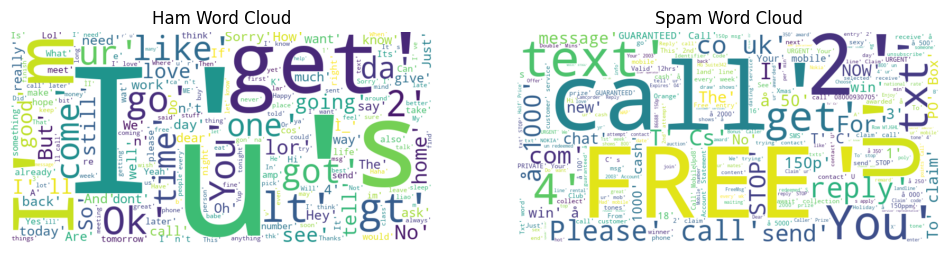

In [46]:
# WordCloud 진행

from wordcloud import WordCloud

ham_ = ""
for j in spam[spam['v1'] == 'ham']['v2']:
    ham_ = ham_ + str(j) + " "


spam_ = ""
for j in spam[spam['v1'] == 'spam']['v2']:
    spam_ = spam_ + str(j) + " "
    

ham_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(ham_)
spam_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(spam_)

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis("off")

plt.show()

1. 정상메일의 경우 명확하게 빈도수가 높은 단어가 없지만, 그래도 확인해보면, `I, u, get, like, Ok, go, time`과 같은 단어가 많이 나오는 것을 볼 수 있다.

2. 스팸메일의 경우에는 정상메일보다는 더 명확하게 빈도수 높은 단어들을 확인할 수 있는데, `free, call, text, reply, you, please, get`과 같은 단어들이 많이 나오는 것을 확인할 수 있다.

3. 위 단어들을 해석해보았을 때, 스팸메일의 경우 `free` 무료라는 키워드로 사람들에게 관심을 끄는 것으로 보이며, 또한 `call, reply, please, text, get` 키워드를 봤을 때, 답변을 달라는 식으로 메일을 보내면서 사기를 유도하는 것으로 파악할 수 있을 것 같다.